<h2>FIN5622 Project #6
    <p class="text-primary">Stock Price Prediction with Machine Learning</p>
</h2>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    In this project we will compare the performance of a linear regression model against a neural network in predicting the stock returns of Apple using the 5 Fama-French Factors as explanatory variables.
    </div>
</div>

<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Tasks are intended to be done in order with results from one task informing work in later tasks. Include all code used to produce your results, and support your answers with textual explanations if neccessary. <b>Any written text must be typed in a markdown cell to receive credit!</b> You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5622_Project_6_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Import all libraries that you plan on using in the code block below.
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS, add_constant
import tensorflow as tf
print("TensorFlow version:", tf.__version__) #Check Tensorflow version is at least 2.8!

TensorFlow version: 2.10.0


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body"> 
    The dataset "Fama_French_5_Factors_Daily.csv" contains pre-constructed factors for the Fama-French Models developed by economists Eugene Fama and Kenneth French. They include daily time series of the following risk factors:
    <br>
    <ul>
        <li><b>ERP</b> (Equity Risk Premium): Excess return of market over risk-free rate.</li>
        <li><b>SMB</b> (Small Minus Big): Excess returns of small market cap firms over large cap firms.</li>
        <li><b>HML</b> (High Minus Low):  Excess returns of high Book-to-Market ratio firms over low firms.</li>
        <li><b>RMW</b> (Robust Minus Weak): Excess returns of profitable firms over least profitable firms.</li>
        <li><b>CMA</b> (Conservative Minus Aggressive): Excess return of conservative firms over aggressive firms.</li>
        <li><b>RF</b> (Risk-free Rate): Proxied by the 1-month Treasury rate.</li>
    </ul>
    These 5 factors when used in econometric regression of historical stock prices forms the asset valuation model known as the Fama-French 5-Factor Model. The file "AAPL.csv" contains only two columns, "Date" and "Price", which represents the daily stock price for Apple. We will use these 5-factors to build an asset valuation model for Apple stock. 
    <br><br>
    Read in the datasets "Fama_French_5_Factors_Daily.csv" and "AAPL.csv" into dataframes using the pandas <code>pd.read_csv()</code> function, as well as set the "Date" column as the index, and make sure to set <code>parse_dates = ['Date']</code>. Combine the two DataFrames into a single DataFrame, keeping only the dates where there are observations under both datasets. Store this in a variable called <code>data</code>. 
    <br><br>
    Calculate the daily log-returns of AAPL, and store this in <code>data</code> as a new column called <code>Returns</code>. Next subtract from <code>Returns</code> the risk-free rate in column <code>RF</code>, and store this result in <code>data</code> as a new column called <code>ExcessReturns</code>. Drop any rows in <code>data</code> containing missing values, or <code>NaN</code>'s.
    <br><br>
    Your final DataFrame should have 9928 rows and 9 columns, and look like this:

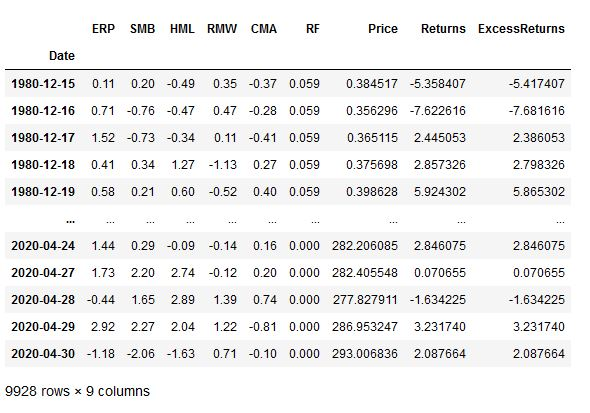
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [2]:
data = pd.read_csv('Fama_French_5_Factors_Daily[1].csv', index_col = 'Date', parse_dates = ['Date'])
AAPL = pd.read_csv('AAPL[1].csv', index_col = 'Date', parse_dates = ['Date'])

data = pd.read_csv('Fama_French_5_Factors_Daily[1].csv', index_col = 'Date', parse_dates = ['Date'])
AAPL = pd.read_csv('AAPL[1].csv', index_col = 'Date', parse_dates = ['Date'])

data = pd.concat((data, AAPL), axis = 1)
data['Returns'] = np.log(1 + data['Price'].pct_change()) * 100
data['ExcessReturns'] = data['Returns'] - data['RF']
data = data.dropna()

In [3]:
data

,ERP,SMB,HML,RMW,CMA,RF,Price,Returns,ExcessReturns
Date,,,,,,,,,
1980-12-15,0.11,0.20,-0.49,0.35,-0.37,0.059,0.384517,-5.358407,-5.417407
1980-12-16,0.71,-0.76,-0.47,0.47,-0.28,0.059,0.356296,-7.622616,-7.681616
1980-12-17,1.52,-0.73,-0.34,0.11,-0.41,0.059,0.365115,2.445053,2.386053
1980-12-18,0.41,0.34,1.27,-1.13,0.27,0.059,0.375698,2.857326,2.798326
1980-12-19,0.58,0.21,0.60,-0.52,0.40,0.059,0.398628,5.924302,5.865302
...,...,...,...,...,...,...,...,...,...
2020-04-24,1.44,0.29,-0.09,-0.14,0.16,0.000,282.206085,2.846075,2.846075
2020-04-27,1.73,2.20,2.74,-0.12,0.20,0.000,282.405548,0.070655,0.070655
2020-04-28,-0.44,1.65,2.89,1.39,0.74,0.000,277.827911,-1.634225,-1.634225


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    We will predict the target variable "ExcessReturns" (representing the excess return above the risk-free rate on Apple stock) using the 5 Fama-French factors as our explanatory variables. For conveniance, create a variable with the list of the columns names: <code>factors = ['ERP', 'SMB', 'HML', 'RMW', 'CMA']</code>.
    <br><br>
    Next we will split <code>data</code> into training and test datasets. Specifically, store all observations prior to the date '2019-04-30' in a variable called <code>train_data</code>, and all observations afterwards in a variable called <code>test_data</code>.
    Check that each DataFrame shoud have the following shapes: 
    <ul>
        <li><code>train_data.shape = (9675, 9)</code></li>
        <li><code>test_data.shape = (254, 9)</code></li>
    </ul>
    <p style="text-align:right;">[5pts]</p>
    </div>
</div>

In [4]:
factors = ['ERP', 'SMB', 'HML', 'RMW', 'CMA']

train_data = data.loc[:'2019-04-30'].copy()
test_data = data.loc['2019-04-30':].copy()

print('train_data.shape = ', train_data.shape)
print('test_data.shape = ', test_data.shape)

train_data.shape =  (9675, 9)
test_data.shape =  (254, 9)


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
    Fit a linear regression model on <code>train_data</code>, predicting <code>'ExcessReturns'</code> using the 5 Fama-French factors in <code>factors</code>. Remember to add a constant to the explanatory variables in order to fit the intercept. Store this model in a variable called <code>lin_model</code>.
    <br><br>
    Print the beta coefficients of the model. For each coefficient, comment on whether the sign (positive or negative) is as expected. Explain why or why not.
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [5]:
lin_model = LinearRegression().fit(train_data[factors], train_data[['ExcessReturns']])

pd.Series(lin_model.intercept_.squeeze(), index = factors)

ERP    0.037139
SMB    0.037139
HML    0.037139
RMW    0.037139
CMA    0.037139
dtype: float64

In [6]:
pd.Series(lin_model.coef_.squeeze(), index = factors)

ERP    1.087326
SMB   -0.088295
HML   -0.488913
RMW   -0.155495
CMA   -1.020691
dtype: float64

ERP being a positive 1.087326 is expected, due to the increasing risk having a sybiotic relationship with stock price (positive risk drives up stock price).

SMB being negative -0.088295 is expected, as AAPL is a large company and would likely have more large cap returns than small cap returns, as evident by this value.

HML being -0.488913 is similar to the previous answer, as large firms are have a lower value of B/P when compared to small firms. This negative value illustrates this point.

RMW being negative -0.155495 is unexpected, as this should be positive as its a measure of how higher earning firms achieve profitability over lower earning firms. Despite AAPL being a high earning firm, it is evident that this negative value is unexepected as being a high earning firm should make AAPL have a positive RMW.

CMA being a negative -1.020691 is expected, as in this situation all of the firms that were aggresively investing were profiting, while to converse was evident. This value further illustrates that data point.

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    Using the linear regression model, <code>lin_model</code>, fitted in the previous task, predict the excess returns on <code>test_data</code>. Convert the excess returns into absolute returns by adding back the risk-free rate (column "RF"). Store the absolute return predictions as a new column in <code>test_data</code> called "FamaFrenchPredictions".
    <br><br>
    The resulting <code>test_data</code> should look similar to the following:
        
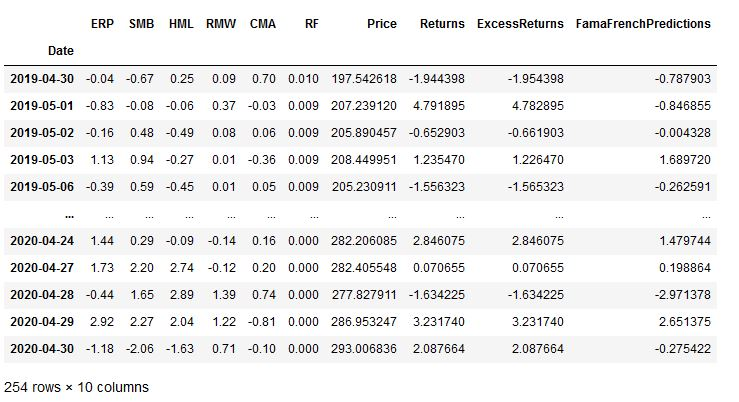
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [7]:
predict_ex_return = lin_model.predict(test_data[factors])[:, -1]
test_data['FamaFrenchPredictions'] = predict_ex_return + test_data['RF']
test_data

,ERP,SMB,HML,RMW,CMA,RF,Price,Returns,ExcessReturns,FamaFrenchPredictions
Date,,,,,,,,,,
2019-04-30,-0.04,-0.67,0.25,0.09,0.70,0.010,197.542618,-1.944398,-1.954398,-0.787903
2019-05-01,-0.83,-0.08,-0.06,0.37,-0.03,0.009,207.239120,4.791895,4.782895,-0.846855
2019-05-02,-0.16,0.48,-0.49,0.08,0.06,0.009,205.890457,-0.652903,-0.661903,-0.004328
2019-05-03,1.13,0.94,-0.27,0.01,-0.36,0.009,208.449951,1.235470,1.226470,1.689720
2019-05-06,-0.39,0.59,-0.45,0.01,0.05,0.009,205.230911,-1.556323,-1.565323,-0.262591
...,...,...,...,...,...,...,...,...,...,...
2020-04-24,1.44,0.29,-0.09,-0.14,0.16,0.000,282.206085,2.846075,2.846075,1.479744
2020-04-27,1.73,2.20,2.74,-0.12,0.20,0.000,282.405548,0.070655,0.070655,0.198864
2020-04-28,-0.44,1.65,2.89,1.39,0.74,0.000,277.827911,-1.634225,-1.634225,-2.971378


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
     We will now train a nueral network on the same to compare its performance. Recall that we first need to convert the data into tensors using the function <code>tf.convert_to_tensor()</code>. Set-up variables <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, <code>y_test</code> to store the corresponding data from <code>train_data</code> and <code>test_data</code> as tensors. 
    <br><br>
    The 4 tensors should have the following shapes:
    <ul>
        <li><code>X_train.shape = TensorShape([9675, 5])</code></li>
        <li><code>X_test.shape = TensorShape([254, 5])</code></li>
        <li><code>y_train.shape = TensorShape([9675])</code></li>
        <li><code>y_test.shape = TensorShape([254])</code></li>
    </ul>
    <p style="text-align:right;">[5pts]</p>
    </div>
</div>

In [8]:
X_train = tf.convert_to_tensor(train_data[factors])
y_train = tf.convert_to_tensor(train_data['ExcessReturns'])
X_test = tf.convert_to_tensor(test_data[factors])
y_test = tf.convert_to_tensor(test_data['ExcessReturns'])

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(TensorShape([9675, 5]),
 TensorShape([254, 5]),
 TensorShape([9675]),
 TensorShape([254]))

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 6</b>
    </div>
    <div class = "panel-body"> 
    Create a neural network model with the following architecture (recall this is done using the tensor flow function <code>tf.keras.models.Sequential()</code>), and store this in a variable called <code>nnet_model</code>:
    <ul>
        <li>A hidden layer with 16 nodes and ReLU activation function, with L1 regularization applied to both the weights and biases with the coefficient set to 0.001.</li>
        <li>Apply dropout to the first hidden layer with a 10% dropout rate.</li>
        <li>A second hidden layer with 32 nodes and ReLU activation function, with L1 regularization applied to both the weights and biases with the coefficient set to 0.001.</li>
        <li>Apply dropout to the second hidden layer with a 10% dropout rate.</li>
        <li>An output layer with 1 node, since we are predicting only one target variable.</li>
    </ul>
    Hint, to apply L1 regularization pass the following parameters to the <code>tf.keras.layers.Dense()</code> function: 
    <ul>
        <li><code>kernel_regularizer = tf.keras.regularizers.L1(0.001)</code></li>
        <li><code>bias_regularizer = tf.keras.regularizers.L1(0.001)</code></li>
    </ul>
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [10]:
nnet_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation = 'relu', 
                          kernel_regularizer = tf.keras.regularizers.L1(.001), 
                          bias_regularizer = tf.keras.regularizers.L1(.001)),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(32, activation = 'relu', 
                          kernel_regularizer = tf.keras.regularizers.L1(.001), 
                          bias_regularizer = tf.keras.regularizers.L1(.001)),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(1),
])

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 7</b>
    </div>
    <div class = "panel-body"> 
    Configure the tensorflow model compilier for <code>nnet_model</code>, which will facilitate the training of our nueral network. Recall that this is done by calling the <code>.compile()</code> method of the neural network model object. 
    <br><br>
    The two parameters we will need to configure in are:
    <ul>
        <li><code>loss</code>: Since we are training a regression model, the tensorflow loss function to use here is <code>tf.keras.losses.MeanSquaredError()</code>. </li>
        <li><code>optimizer</code>: Use Adam as the optimizer, tensorflow function is <code>tf.keras.optimizers.Adam()</code>. Set the learning rate equal to 0.00005.</li>
    </ul>
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [11]:
loss_fx = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate = .00005)

nnet_model.compile(optimizer = opt, loss = loss_fx)

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 8</b>
    </div>
    <div class = "panel-body"> 
    Now we will train the neural network. Recall that this is done by calling the <code>.fit()</code> method of the neural network model object. Provide the method with the training data (<code>X_train</code> and <code>y_train</code>), as well as the following additional parameters:
    <ul>
        <li><code>validation_data = (X_test, y_test)</code>: this allows for the evaluation of model performance on the test data during training.</li>
        <li><code>epochs = 200</code>: trains the model on 200 passes of the training data.</li>
        <li><code>shuffle = True</code>: shuffles the training data in between each epoch.</li>
        <li><code>batch_size = 200</code>: sets the batch size to 200 samples under each iteration.</li>
    </ul>
    Plot both the training loss and test loss on a single line plot. Label the axes and provide a legend. Your plot should look similar to the following:
        
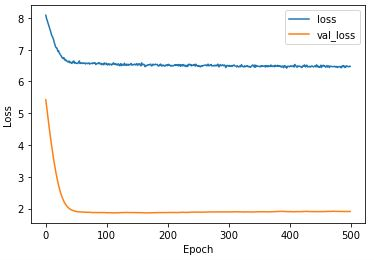
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [12]:
history = nnet_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 200, 
                           shuffle = True, batch_size = 200)

Epoch 1/200
49/49 [==============================] - 2s 14ms/step - loss: 8.7153 - val_loss: 6.1927
Epoch 2/200
49/49 [==============================] - 0s 9ms/step - loss: 8.6026 - val_loss: 5.9842
Epoch 3/200
49/49 [==============================] - 1s 11ms/step - loss: 8.4969 - val_loss: 5.7848
Epoch 4/200
49/49 [==============================] - 1s 14ms/step - loss: 8.4168 - val_loss: 5.5919
Epoch 5/200
49/49 [==============================] - 1s 9ms/step - loss: 8.3420 - val_loss: 5.4107
Epoch 6/200
49/49 [==============================] - 1s 12ms/step - loss: 8.3323 - val_loss: 5.2356
Epoch 7/200
49/49 [==============================] - 0s 3ms/step - loss: 8.1806 - val_loss: 5.0625
Epoch 8/200
49/49 [==============================] - 0s 3ms/step - loss: 8.0851 - val_loss: 4.8923
Epoch 9/200
49/49 [==============================] - 1s 12ms/step - loss: 8.0778 - val_loss: 4.7332
Epoch 10/200
49/49 [==============================] - 0s 4ms/step - loss: 7.9857 - val_loss: 4.5744
Epoc

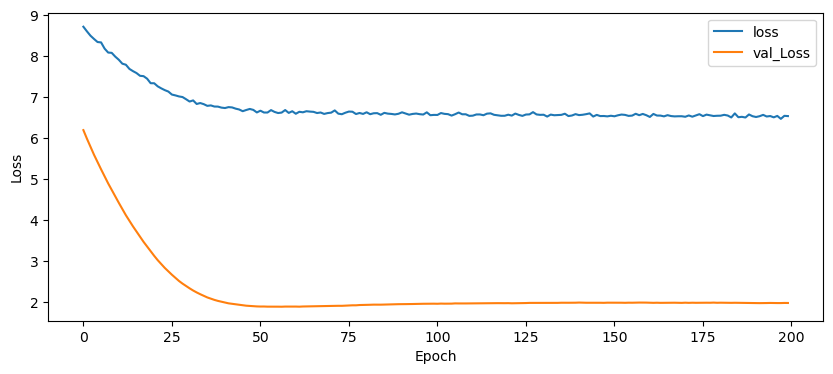

In [13]:
plt.figure(figsize = (10, 4))
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 9</b>
    </div>
    <div class = "panel-body"> 
    Calculate the excess return predictions from the neural network <code>nnet_model</code> on the test dataset <code>X_test</code>, and remember to convert the predictions from a tensor back into a numpy array. Recall, use the <code>.numpy()</code> method to turn tensors into numpy arrays.
    <br><br>
    Calculate the absolute return predictions by adding back the risk-free rate (column "RF"), and store them as a new column in <code>test_data</code> called "NeuralNetPredictions".
    <br><br>
    The resulting <code>test_data</code> should look similar to the following:
        
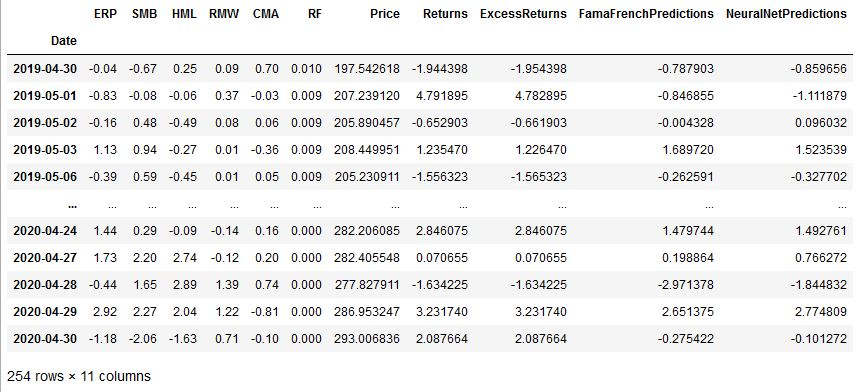
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [14]:
pred = nnet_model(X_test).numpy()
test_data['NeuralNetPredictions'] = pred.flatten() + test_data['RF']
test_data

,ERP,SMB,HML,RMW,CMA,RF,Price,Returns,ExcessReturns,FamaFrenchPredictions,NeuralNetPredictions
Date,,,,,,,,,,,
2019-04-30,-0.04,-0.67,0.25,0.09,0.70,0.010,197.542618,-1.944398,-1.954398,-0.787903,-0.769329
2019-05-01,-0.83,-0.08,-0.06,0.37,-0.03,0.009,207.239120,4.791895,4.782895,-0.846855,-0.994220
2019-05-02,-0.16,0.48,-0.49,0.08,0.06,0.009,205.890457,-0.652903,-0.661903,-0.004328,0.049415
2019-05-03,1.13,0.94,-0.27,0.01,-0.36,0.009,208.449951,1.235470,1.226470,1.689720,1.663512
2019-05-06,-0.39,0.59,-0.45,0.01,0.05,0.009,205.230911,-1.556323,-1.565323,-0.262591,-0.286680
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,1.44,0.29,-0.09,-0.14,0.16,0.000,282.206085,2.846075,2.846075,1.479744,1.524231
2020-04-27,1.73,2.20,2.74,-0.12,0.20,0.000,282.405548,0.070655,0.070655,0.198864,0.256755
2020-04-28,-0.44,1.65,2.89,1.39,0.74,0.000,277.827911,-1.634225,-1.634225,-2.971378,-3.242965


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 10</b>
    </div>
    <div class = "panel-body"> 
    Plot in a single line plot the following from <code>test_data</code>:
    <ul>
        <li>The historical Apple stock <b>price</b>.</li>
        <li>The linear regression model's predicted Apple stock <b>price</b>.</li>
        <li>The neural network's predicted Apple stock <b>price</b>.</li>
    </ul>
    Include a legend. The final plot should look similar to the following (it will not be exactly the same due to variations in initial parameters used at the start of neural network training):
        
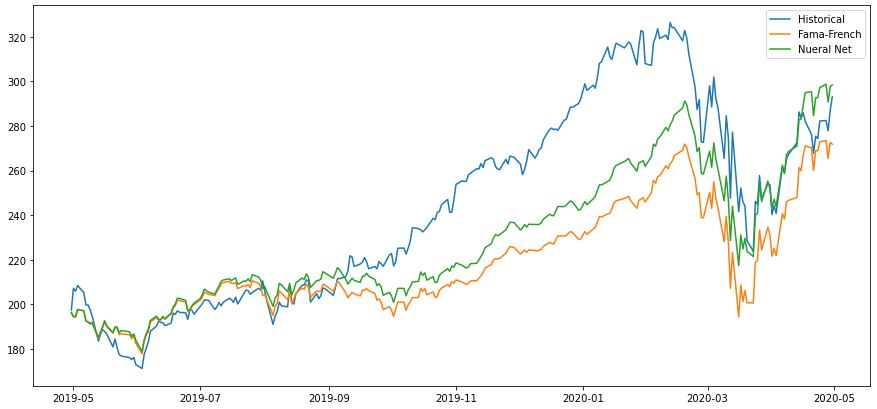
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

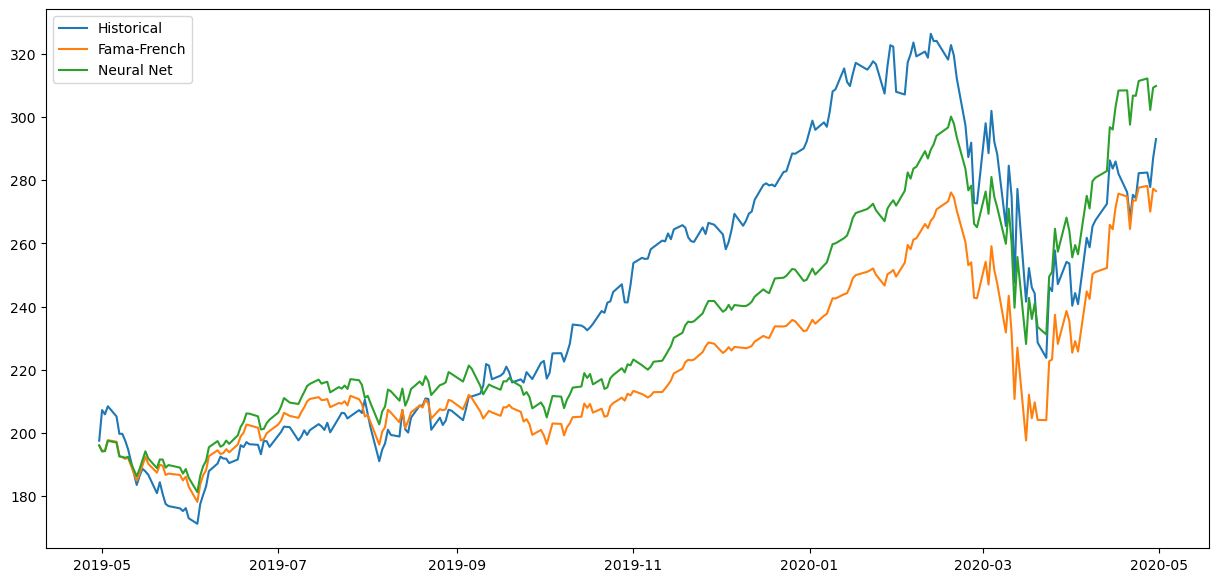

In [15]:
plt.figure(figsize = (15, 7))
plt.plot(test_data['Price'], label = 'Historical')
plt.plot(test_data.loc['2019-04-30', 'Price'] * np.exp(np.cumsum((test_data['FamaFrenchPredictions'] + test_data['RF']) / 100)), label = 'Fama-French')
plt.plot(test_data.loc['2019-04-30', 'Price'] * np.exp(np.cumsum((test_data['NeuralNetPredictions'] + test_data['RF']) / 100)), label = 'Neural Net')
plt.legend()
plt.show()